# Binomial Classification

Dataset: Breast Cancer https://archive.ics.uci.edu/ml/datasets/Breast+Cancer+Wisconsin+(Diagnostic)

In [109]:
import sklearn.datasets as datasets

from matplotlib import pyplot as plt
import pandas as pd

X, y = datasets.load_breast_cancer(return_X_y=True)

Train-test Split https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.train_test_split.html#sklearn.model_selection.train_test_split

In [66]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X,
                                                    y,
                                                    test_size=.3,
                                                    random_state=42)

Scikit https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LogisticRegression.html

In [67]:
from sklearn.linear_model import LogisticRegression

clf = LogisticRegression(penalty='none',
                         solver='lbfgs',
                         random_state=0,
                         verbose=10,
                         n_jobs=-1)

clf = clf.fit(X_train, y_train)

y_pred = clf.predict(X_test)

p = clf.predict_proba(X_test)

print(clf.classes_)

print(clf.score(X_test, y_test))

[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.


[0 1]
0.9766081871345029


[Parallel(n_jobs=-1)]: Done   1 tasks      | elapsed:    1.5s
[Parallel(n_jobs=-1)]: Done   1 out of   1 | elapsed:    1.5s finished


Model Quality https://en.wikipedia.org/wiki/Precision_and_recall

In [68]:
from sklearn.metrics import classification_report, confusion_matrix

conf_m = confusion_matrix(y_test, y_pred)
report = classification_report(y_test, y_pred)

print (conf_m)
print (report)

[[ 61   2]
 [  2 106]]
              precision    recall  f1-score   support

           0       0.97      0.97      0.97        63
           1       0.98      0.98      0.98       108

    accuracy                           0.98       171
   macro avg       0.97      0.97      0.97       171
weighted avg       0.98      0.98      0.98       171



ROC Curve https://scikit-learn.org/stable/modules/generated/sklearn.metrics.roc_curve.html

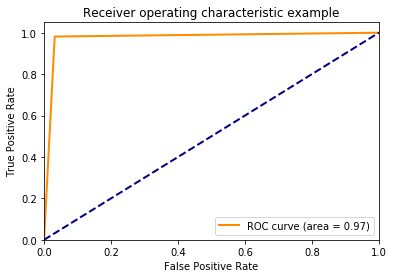

In [69]:
# Compute ROC curve and ROC area

from sklearn.metrics import roc_curve, auc
fpr, tpr, _ = roc_curve(y_test, y_pred, pos_label=1)
roc_auc = auc(fpr, tpr)

plt.figure()
lw = 2
plt.plot(fpr, tpr, color='darkorange',
         lw=lw, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=lw, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic example')
plt.legend(loc="lower right")
plt.show()

https://scikit-learn.org/stable/modules/generated/sklearn.metrics.plot_confusion_matrix.html#sklearn.metrics.plot_confusion_matrix

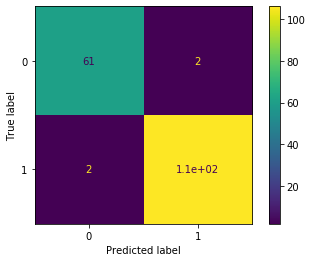

In [71]:
#Plot Confusion Matrix

from sklearn.metrics import plot_confusion_matrix

plot_confusion_matrix(clf, X_test, y_test)

Statmodels
https://www.statsmodels.org/stable/generated/statsmodels.discrete.discrete_model.Logit.fit.html#statsmodels.discrete.discrete_model.Logit.fit

In [72]:
import statsmodels.api as sm

X_sm = sm.add_constant(X_train)
logit = sm.Logit(y_train, X_sm[:, 1:20])
l = logit.fit()
l.params

Optimization terminated successfully.
         Current function value: 0.086093
         Iterations 13


array([-2.26869536e+00, -4.77729714e-01,  8.88691350e-01, -3.98855254e-02,
       -5.64796490e+00,  5.57744721e+01, -9.18075769e+01, -1.33739834e+02,
       -4.74269083e+01, -4.10413197e+01,  1.54515085e+01,  1.42756710e+00,
        7.43052080e-01, -3.20241237e-01,  2.44073221e+01, -4.97228774e+01,
        1.02711898e+02,  1.58442526e+02,  8.33231296e+01])

In [73]:
l.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:                      y   No. Observations:                  398
Model:                          Logit   Df Residuals:                      379
Method:                           MLE   Df Model:                           18
Date:                Wed, 02 Sep 2020   Pseudo R-squ.:                  0.8698
Time:                        12:08:02   Log-Likelihood:                -34.265
converged:                       True   LL-Null:                       -263.17
Covariance Type:            nonrobust   LLR p-value:                 7.468e-86
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
x1            -2.2687      6.125     -0.370      0.711     -14.274       9.736
x2            -0.4777      0.115     -4.139      0.000      -0.704      -0.252
x3             0.8887      0.920      0.966      0.334      -0.914       2.691
x4            -0.0399      0.018     -2.246      0.025      -0.075      -0.005
x5            -5.6480     72.230     -0.078      0.938    -147.217     135.921
x6            55.7745     46.254      1.206      0.228     -34.882     146.431
x7           -91.8076     46.845     -1.960      0.050    -183.623       0.008
x8          -133.7398     77.000     -1.737      0.082    -284.658      17.178
x9           -47.4269     21.934     -2.162      0.031     -90.417      -4.437
x10          -41.0413    116.671     -0.352      0.725    -269.713     187.631
x11           15.4515     20.460      0.755      0.450     -24.648      55.551
x12            1.4276      1.051      1.358      0.174      -0.633       3.488
x13            0.7431      1.399      0.531      0.595      -2.000       3.486
x14           -0.3202      0.197     -1.628      0.104      -0.706       0.065
x15           24.4073    184.639      0.132      0.895    -337.478     386.292
x16          -49.7229     71.965     -0.691      0.490    -190.771      91.326
x17          102.7119     77.406      1.327      0.185     -49.002     254.426
x18          158.4425    205.698      0.770      0.441    -244.717     561.602
x19           83.3231     66.009      1.262      0.207     -46.051     212.698
==============================================================================

Possibly complete quasi-separation: A fraction 0.32 of observations can be
perfectly predicted. This might indicate that there is complete
quasi-separation. In this case some parameters will not be identified.
"""

Decision Boundary

[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done   1 tasks      | elapsed:    0.5s
[Parallel(n_jobs=-1)]: Done   1 out of   1 | elapsed:    0.5s finished


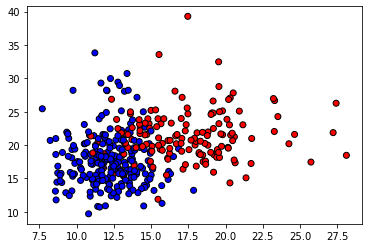

(9.21, 39.76999999999935)

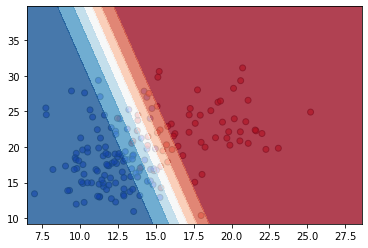

In [105]:
from matplotlib.colors import ListedColormap
import numpy as np

clf = clf.fit(X[:, 0:2], y)

h = .02

x_min, x_max = X[:, 0].min() - .5, X[:, 0].max() + .5
y_min, y_max = X[:, 1].min() - .5, X[:, 1].max() + .5
xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                         np.arange(y_min, y_max, h))
cm = plt.cm.RdBu
cm_bright = ListedColormap(['#FF0000', '#0000FF'])

plt.scatter(X_train[:, 0], X_train[:, 1], c=y_train, cmap=cm_bright,
                   edgecolors='k')
plt.show()
plt.scatter(X_test[:, 0], X_test[:, 1], c=y_test, cmap=cm_bright, alpha=0.6,
               edgecolors='k')

# Plot the decision boundary. For that, we will assign a color to each# point in the mesh [x_min, x_max]x[y_min, y_max].
Z = clf.predict_proba(np.c_[xx.ravel(), yy.ravel()])[:, 1]

Z = Z.reshape(xx.shape)

plt.contourf(xx, yy, Z, cmap=cm, alpha=.8)

plt.xlim(xx.min(), xx.max())
plt.ylim(yy.min(), yy.max())


# Multinomial Classification

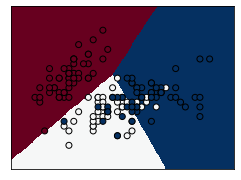

In [112]:
# import iris data
iris = datasets.load_iris()
X = iris.data[:, :2]  
y = iris.target

clf = LogisticRegression()
clf.fit(X, y)

x_min, x_max = X[:, 0].min() - .5, X[:, 0].max() + .5
y_min, y_max = X[:, 1].min() - .5, X[:, 1].max() + .5
h = .02 
xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))
Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])

Z = Z.reshape(xx.shape)
plt.figure(1, figsize=(4, 3))
plt.pcolormesh(xx, yy, Z, cmap=plt.cm.RdBu)

plt.scatter(X[:, 0], X[:, 1], c=y, edgecolors='k', cmap=plt.cm.RdBu)

plt.xlim(xx.min(), xx.max())
plt.ylim(yy.min(), yy.max())
plt.xticks(())
plt.yticks(())

plt.show()